### Name :- Darpan Gaur
### Roll No :- CO21BTECH11004

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def plothistograms(I, J):
    """
    Function to plot the histograms of two images side by side.
    """
    # calculate histograms
    hist_I, bins_I = np.histogram(I.flatten(), 256, [0, 256])
    hist_J, bins_J = np.histogram(J.flatten(), 256, [0, 256])

    # normalize histograms
    hist_I = hist_I / hist_I.sum()
    hist_J = hist_J / hist_J.sum()

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    # Plot histogram for image I
    axs[0].bar(bins_I[:-1], hist_I, width=1, color='r', alpha=0.7)
    axs[0].set_title('Histogram of Image I')
    axs[0].set_xlim([0, 256])
    # axs[0].set_ylim([0, 0.05])
    axs[0].set_xlabel('Pixel Intensity')
    axs[0].set_ylabel('Normalized Frequency')
    # Plot histogram for image J
    axs[1].bar(bins_J[:-1], hist_J, width=1, color='b', alpha=0.7)
    axs[1].set_title('Histogram of Image J')
    axs[1].set_xlim([0, 256])
    # axs[1].set_ylim([0, 0.05])
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Normalized Frequency')
    # Show the plot
    plt.tight_layout()
    plt.show()

def plotImage(I, J):
    """
    Function to plot two images side by side.
    """
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    # Plot image I
    axs[0].imshow(I, cmap='gray')
    axs[0].set_title('Image I')
    axs[0].axis('off')  # Hide axis
    # Plot image J
    axs[1].imshow(J, cmap='gray')
    axs[1].set_title('Image J')
    axs[1].axis('off')  # Hide axis
    # Show the plot
    plt.tight_layout()
    plt.show()

## Gray Scale Point Operations

### 1.1

In [3]:
def linearPointOperation(I, P, L):
    """
    Perform linear point operation on an image.
    
    Parameters:
    I : Input image
    P : Slope of the linear function
    L : Intercept of the linear function
    """
    # Create a new image with the same shape as the input image
    J = np.zeros_like(I)
    
    # Apply the linear point operation
    J = P * I + L
    
    # Clip the values to be in the range [0, 255]
    J = np.clip(J, 0, 255)
    
    return J

def plotHistogramOperator(I, P, L):
    """
    Plot the histogram of the input image and the transformed image.
    """
    J = linearPointOperation(I, P, L)

    # plot original and transformed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(I, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Transformed Image')
    plt.imshow(J, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # calculate histograms
    hist_I, bins_I = np.histogram(I.flatten(), 256, [0, 256])
    hist_J, bins_J = np.histogram(J.flatten(), 256, [0, 256])

    # normalize histograms
    hist_I = hist_I / hist_I.sum()
    hist_J = hist_J / hist_J.sum()

    # plot histograms
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Histogram of Original Image')
    plt.bar(bins_I[:-1], hist_I, width=1, color='blue', alpha=0.7)
    plt.xlim([0, 255])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Probability')
    plt.subplot(1, 2, 2)
    plt.title('Histogram of Transformed Image')
    plt.bar(bins_J[:-1], hist_J, width=1, color='red', alpha=0.7)
    plt.xlim([0, 255])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()

In [4]:
img_path = 'IceHalos_Fous_5568.jpg'
# Read the image
I = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
I = I.astype(np.float32)
if I is None:
    raise ValueError("Image not found or unable to load.")

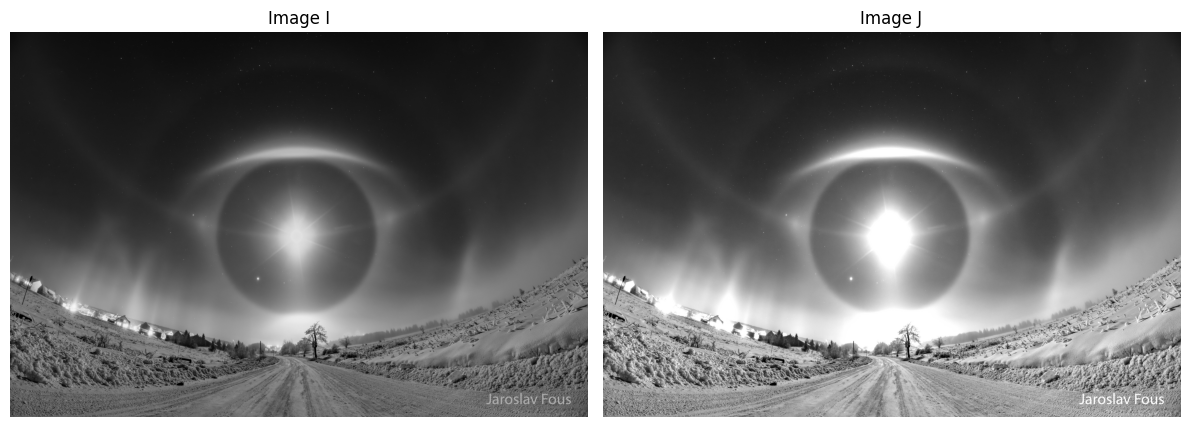

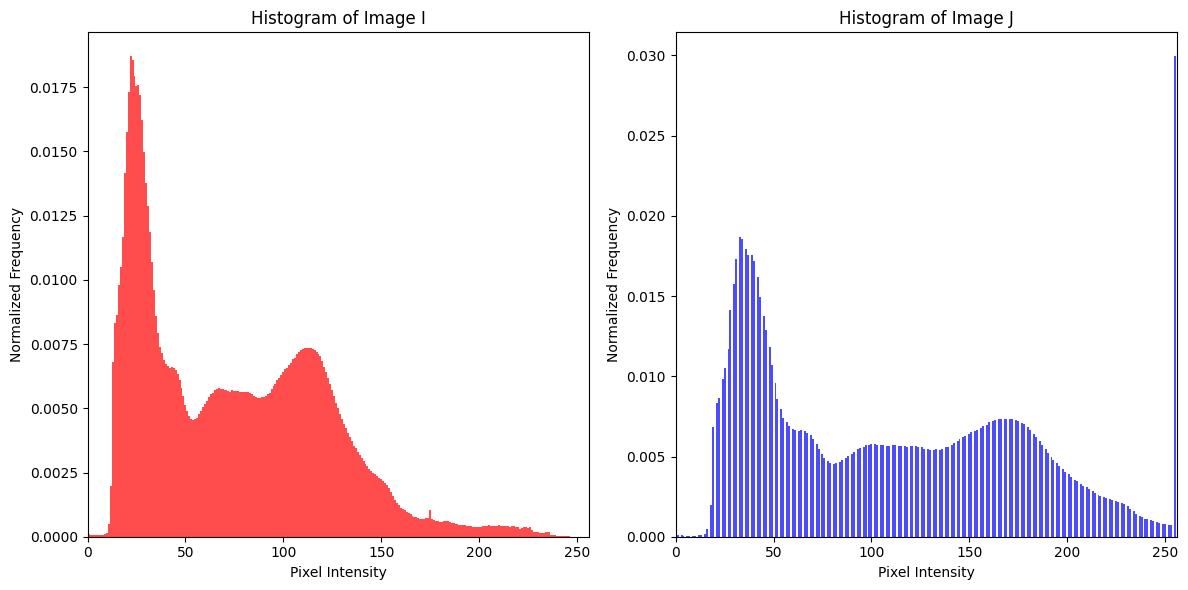

In [5]:
J = linearPointOperation(I, 1.5, 0)
# Display the original and processed images
plotImage(I, J)

# Display the histograms of the original and processed images
plothistograms(I, J)

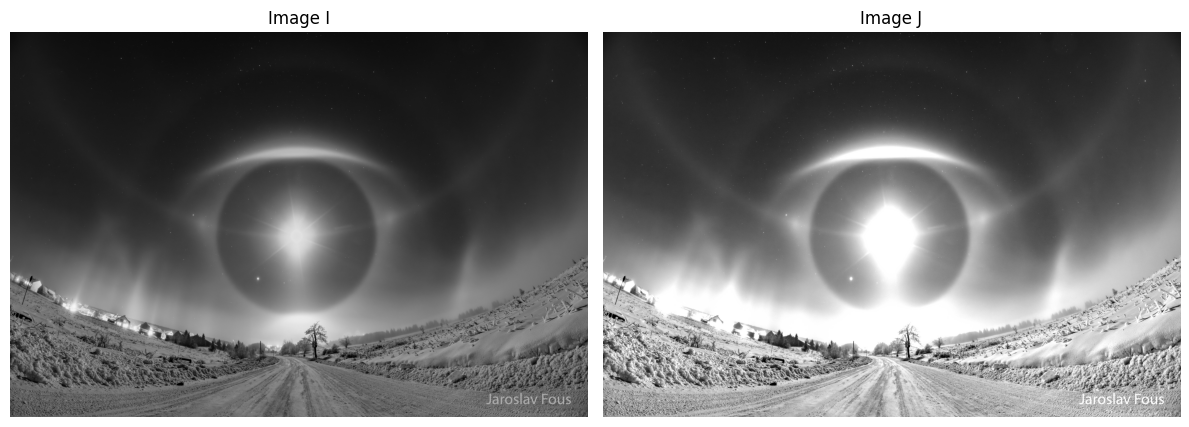

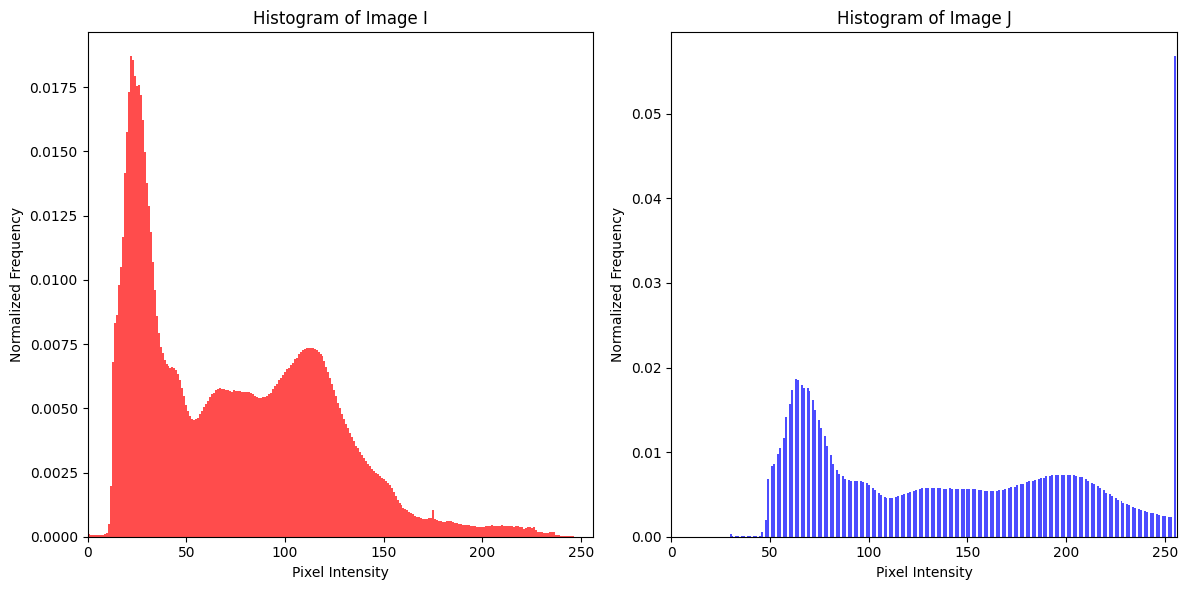

In [6]:
J = linearPointOperation(I, 1.5, 30)
# Display the original and processed images
plotImage(I, J)
# Display the histograms of the original and processed images
plothistograms(I, J)

- J = P * I, stretches the histogram. Eg: P=1.5, it stretches the histogram to the right.
- J = P * I + Q, in addition to stretching, it also shifts the histogram. Eg: Q=40, it shifts the histogram further to the right.

### 1.2

In [7]:
def fullScaleContrastStretching(I):
    """
    Perform full-scale contrast stretching on an image.
    """
    # Find the minimum and maximum pixel values in the image
    min_I = np.min(I)
    max_I = np.max(I)

    
    # Create a new image with the same shape as the input image
    J = np.zeros_like(I)
    # Apply the contrast stretching formula
    J = (I - min_I) * (255 / (max_I - min_I))
    # Clip the values to be in the range [0, 255]
    J = np.clip(J, 0, 255)
    return J

Minimum pixel value in the image: 0.0
Maximum pixel value in the image: 255.0
Minimum pixel value in the transformed image: 0.0
Maximum pixel value in the transformed image: 255.0


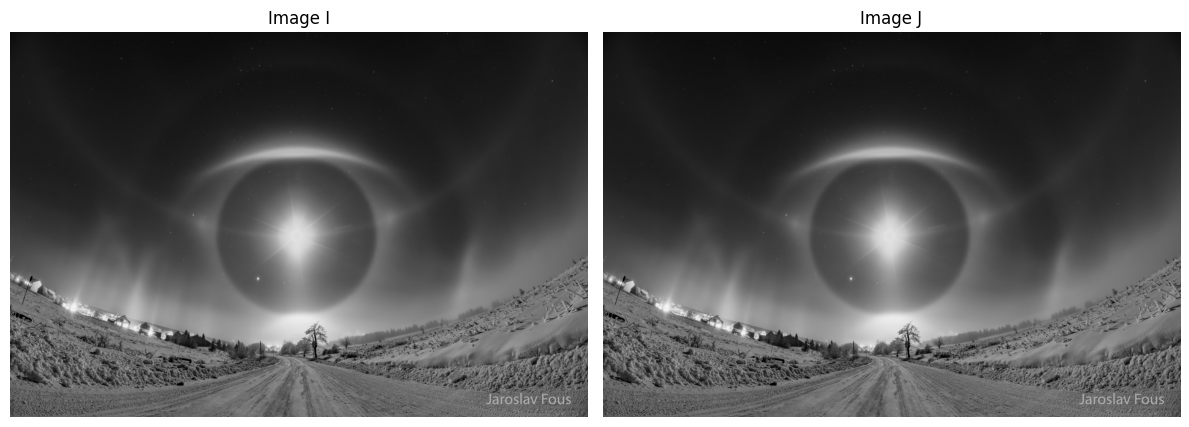

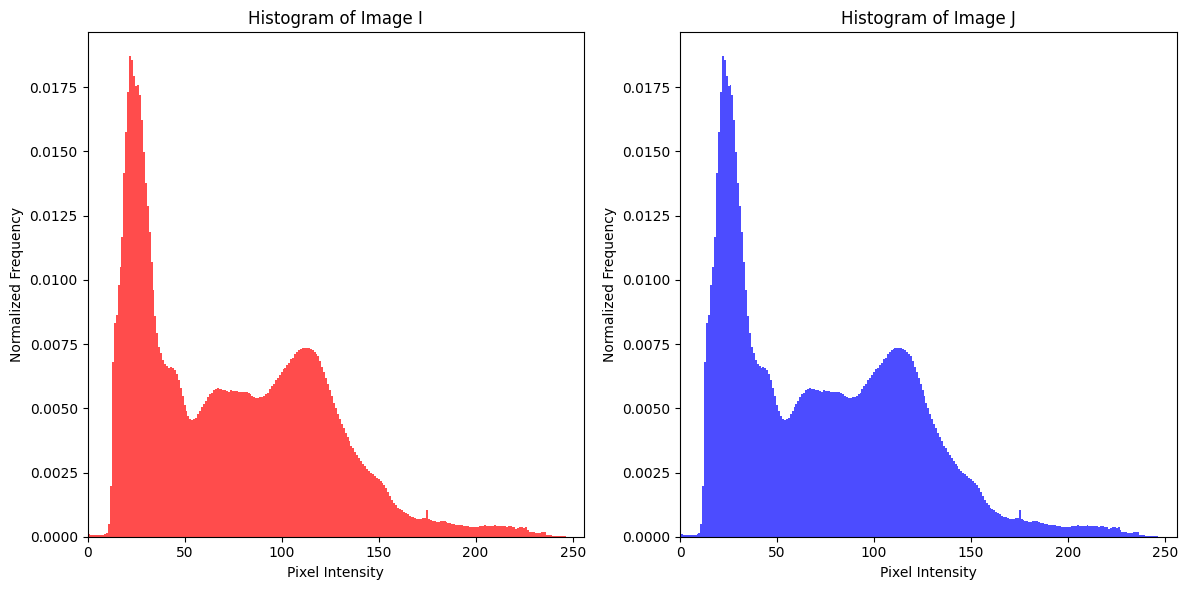

In [8]:
# Read the image
I = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
I = I.astype(np.float32)
if I is None:
    raise ValueError("Image not found or unable to load.")

# print min and max values
print("Minimum pixel value in the image:", np.min(I))
print("Maximum pixel value in the image:", np.max(I))

J = fullScaleContrastStretching(I)
# print min and max values
print("Minimum pixel value in the transformed image:", np.min(J))
print("Maximum pixel value in the transformed image:", np.max(J))

# Display the original and processed images
plotImage(I, J)
# Display the histograms of the original and processed images
plothistograms(I, J)


- The transformed image looks similar to the original image.
- No chnage to the histogram.
- May be image is already normalized.

### 1.3

In [9]:
def logCompression(I, c):
    """
    Perform log compression on an image.
    
    Parameters:
    I : Input image
    c : Constant for log compression
    """
    # Create a new image with the same shape as the input image
    J = np.zeros_like(I)
    
    # Apply the log compression formula
    J = c * np.log(1 + I)
    
    # Clip the values to be in the range [0, 255]
    J = np.clip(J, 0, 255)
    
    return J

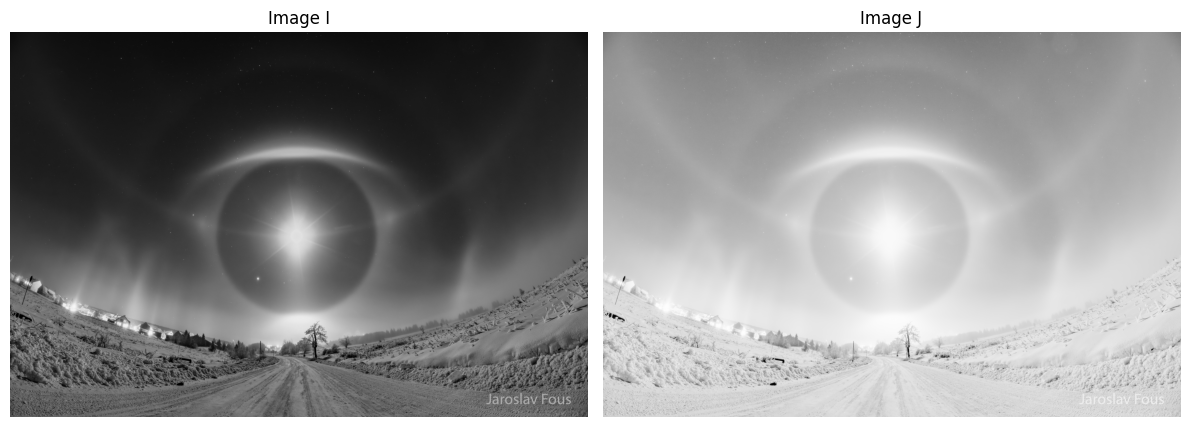

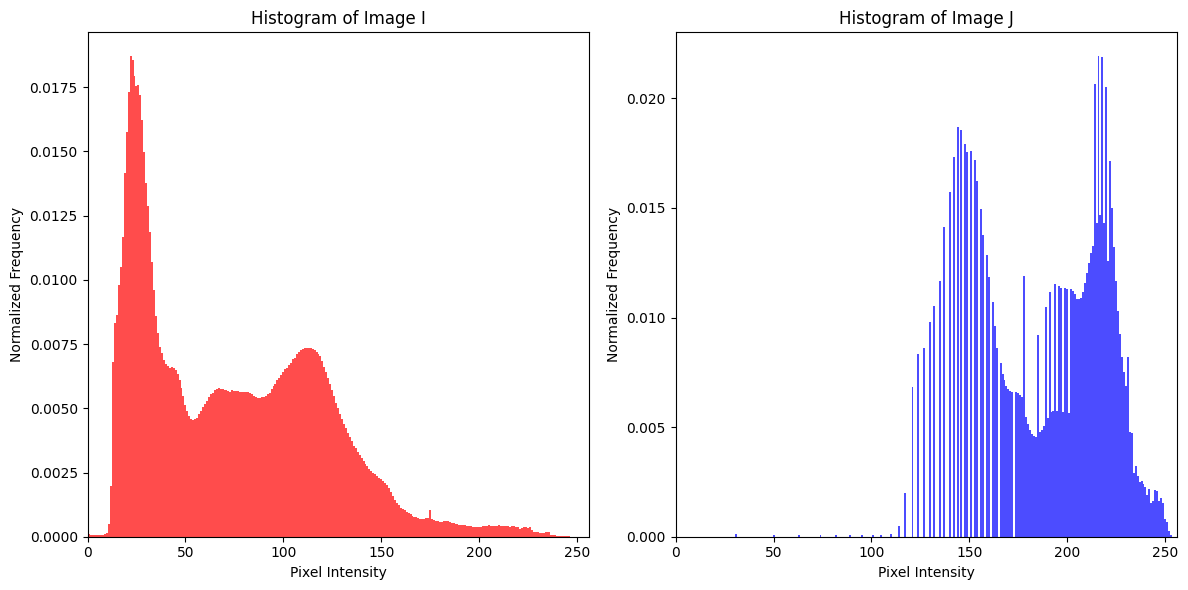

In [10]:
# Read the image
I = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
I = I.astype(np.float32)
if I is None:
    raise ValueError("Image not found or unable to load.")

J = logCompression(I, 10)
J = fullScaleContrastStretching(J)
# Display the original and processed images
plotImage(I, J)
# Display the histograms of the original and processed images
plothistograms(I, J)

- In the histogram, intensity values are shifted to the right, as log operator compresses the values, change in low intensity values is high than high intensity values.
- The transformed image is brighter than the original image.

### 1.4

In [11]:
# gamma correction: J=I^gamma, gamma=1.4. Clip values greater than 255 to 255
def gammaCorrection(I, gamma):
    """
    Perform gamma correction on an image.
    
    Parameters:
    I : Input image
    gamma : Gamma value for correction
    """
    # Create a new image with the same shape as the input image
    J = np.zeros_like(I)
    
    # Apply the gamma correction formula
    J = 255 * ((I / 255) ** gamma)
    
    # Clip the values to be in the range [0, 255]
    J = np.clip(J, 0, 255)
    
    return J

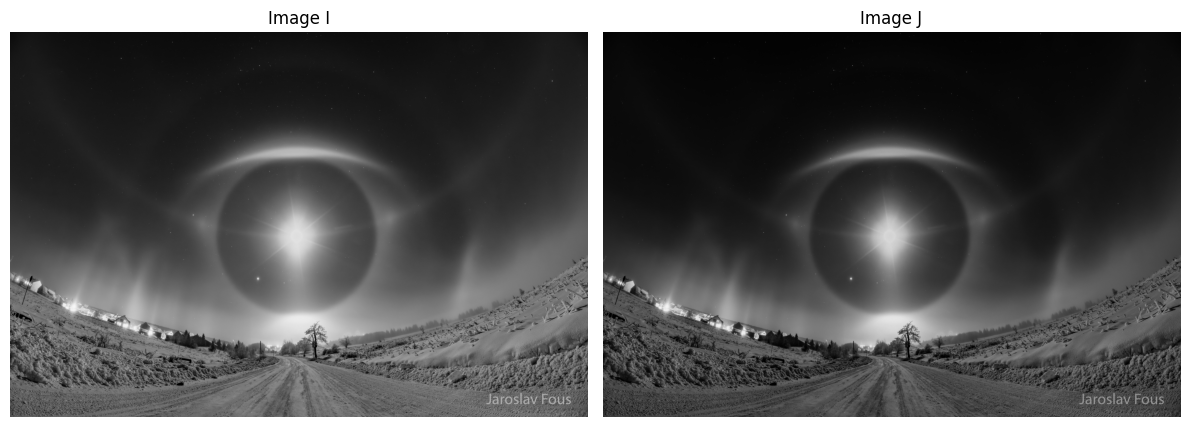

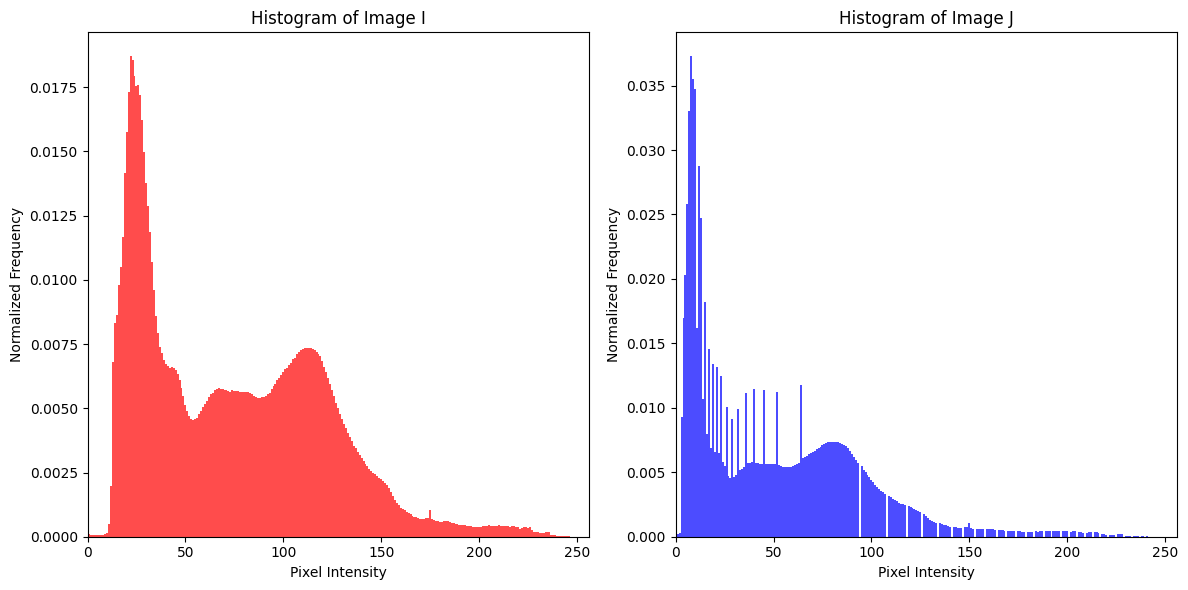

In [12]:
img_path = 'IceHalos_Fous_5568.jpg'
# Read the image
I = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if I is None:
    raise ValueError("Image not found or unable to load.")

J = gammaCorrection(I, 1.4)
# Display the original and processed images
plotImage(I, J)
# Display the histograms of the original and processed images
plothistograms(I, J)

- Conrast of light areas is increased in the transformed image as compared to the original image.
- In histogram, the light areas are stretched and the dark areas are compressed.

## Edge Detection

### 2.1 Gradient Edge Detectors

In [13]:
# Gradient operators
# (a) centered 2-d differncing 
def centeredDifference(I, vertical=True):
    """
    Perform centered difference operation on an image.
    
    Parameters:
    I : Input image
    """
    # Create a new image with the same shape as the input image
    J = np.zeros_like(I)
    
    Gx = np.array([[1, 0, -1]])
    Gy = np.array([[1], [0], [-1]])
    # Apply the centered difference formula
    if vertical:
        J = cv2.filter2D(I, -1, Gx)
    else:
        J = cv2.filter2D(I, -1, Gy)
    # Clip the values to be in the range [0, 255]
    J = np.clip(J, 0, 255).astype(np.uint8)
    return J

# (b) Roberts operator
def robertsOperator(I, vertical=True):
    """
    Perform Roberts operator on an image.
    
    Parameters:
    I : Input image
    """
    # Create a new image with the same shape as the input image
    J = np.zeros_like(I)
    
    Gx = np.array([[1, 0], [0, -1]])
    Gy = np.array([[0, 1], [-1, 0]])
    # Apply the Roberts operator formula
    if vertical:
        J = cv2.filter2D(I, -1, Gx)
    else:
        J = cv2.filter2D(I, -1, Gy)
    # Clip the values to be in the range [0, 255]
    J = np.clip(J, 0, 255).astype(np.uint8)
    return J

# (c) Prewitt operator
def prewittOperator(I, vertical=True):
    """
    Perform Prewitt operator on an image.
    
    Parameters:
    I : Input image
    """
    # Create a new image with the same shape as the input image
    J = np.zeros_like(I)
    
    Gx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    Gy = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    # Apply the Prewitt operator formula
    if vertical:
        J = cv2.filter2D(I, -1, Gx)
    else:
        J = cv2.filter2D(I, -1, Gy)
    # Clip the values to be in the range [0, 255]
    J = np.clip(J, 0, 255).astype(np.uint8)
    return J

# (d) Sobel operator
def sobelOperator(I, vertical=True):
    """
    Perform Sobel operator on an image.
    
    Parameters:
    I : Input image
    """
    # Create a new image with the same shape as the input image
    J = np.zeros_like(I)
    
    Gx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    # Apply the Sobel operator formula
    if vertical:
        J = cv2.filter2D(I, -1, Gx)
    else:
        J = cv2.filter2D(I, -1, Gy)
    # Clip the values to be in the range [0, 255]
    J = np.clip(J, 0, 255).astype(np.uint8)
    return J



In [5]:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Gx = np.array([[1, 0], [0, -1]])
# apply gx on x
y = cv2.filter2D(x, -1, Gx)

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/filter.simd.hpp:3250: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=4), and destination format (=4) in function 'getLinearFilter'


In [14]:
# gradient magnitude
def gradientMagnitude(x, y, threshold=0, name='euclidean'):
    """
    Compute the gradient magnitude of an image.
    """
    # Compute the gradient magnitude
    if name == 'euclidean':
        J = np.sqrt(x**2 + y**2)
    elif name == 'manhattan':
        J = np.abs(x) + np.abs(y)
    elif name == 'maximum':
        J = np.maximum(np.abs(x), np.abs(y))
    else:
        raise ValueError("Unknown gradient magnitude method.")
    
    # Clip the values to be in the range [0, 255]
    J = np.clip(J, 0, 255).astype(np.uint8)

    # Apply thresholding
    J[J < threshold] = 0
    # J[J >= threshold] = 255

    return J

In [ ]:
def getEdgeMap(I, gradient='sobel', magnitude='euclidean', threshold=0):
    """
    Get the edge map of an image using the specified gradient operator.
    """
    # Create a new image with the same shape as the input image
    J = np.zeros_like(I)
    
    # Apply the specified gradient operator
    if gradient == 'sobel':
        Gx = sobelOperator(I, vertical=True)
        Gy = sobelOperator(I, vertical=False)
    elif gradient == 'prewitt':
        Gx = prewittOperator(I, vertical=True)
        Gy = prewittOperator(I, vertical=False)
    elif gradient == 'roberts':
        Gx = robertsOperator(I, vertical=True)
        Gy = robertsOperator(I, vertical=False)
    elif gradient == 'centered':
        Gx = centeredDifference(I, vertical=True)
        Gy = centeredDifference(I, vertical=False)
    else:
        raise ValueError("Unknown gradient operator.")
    
    # Compute the gradient magnitude
    J = gradientMagnitude(Gx, Gy, threshold=threshold, name=magnitude)

    return J

In [ ]:
# load tiff image
img_path = '4.2.03.tiff'
I = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
J
I = I.astype(np.float32)
if I is None:
    raise ValueError("Image not found or unable to load.")

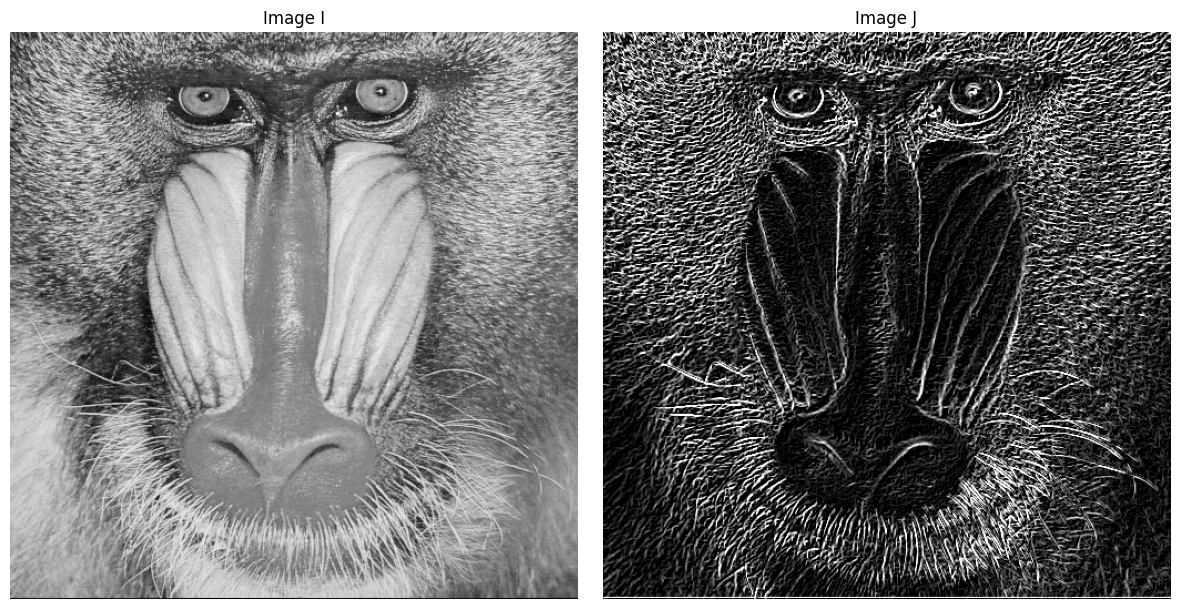

In [17]:
J = getEdgeMap(I, gradient='sobel', magnitude='maximum', threshold=10.0)
# Display the original and processed images
plotImage(I, J)

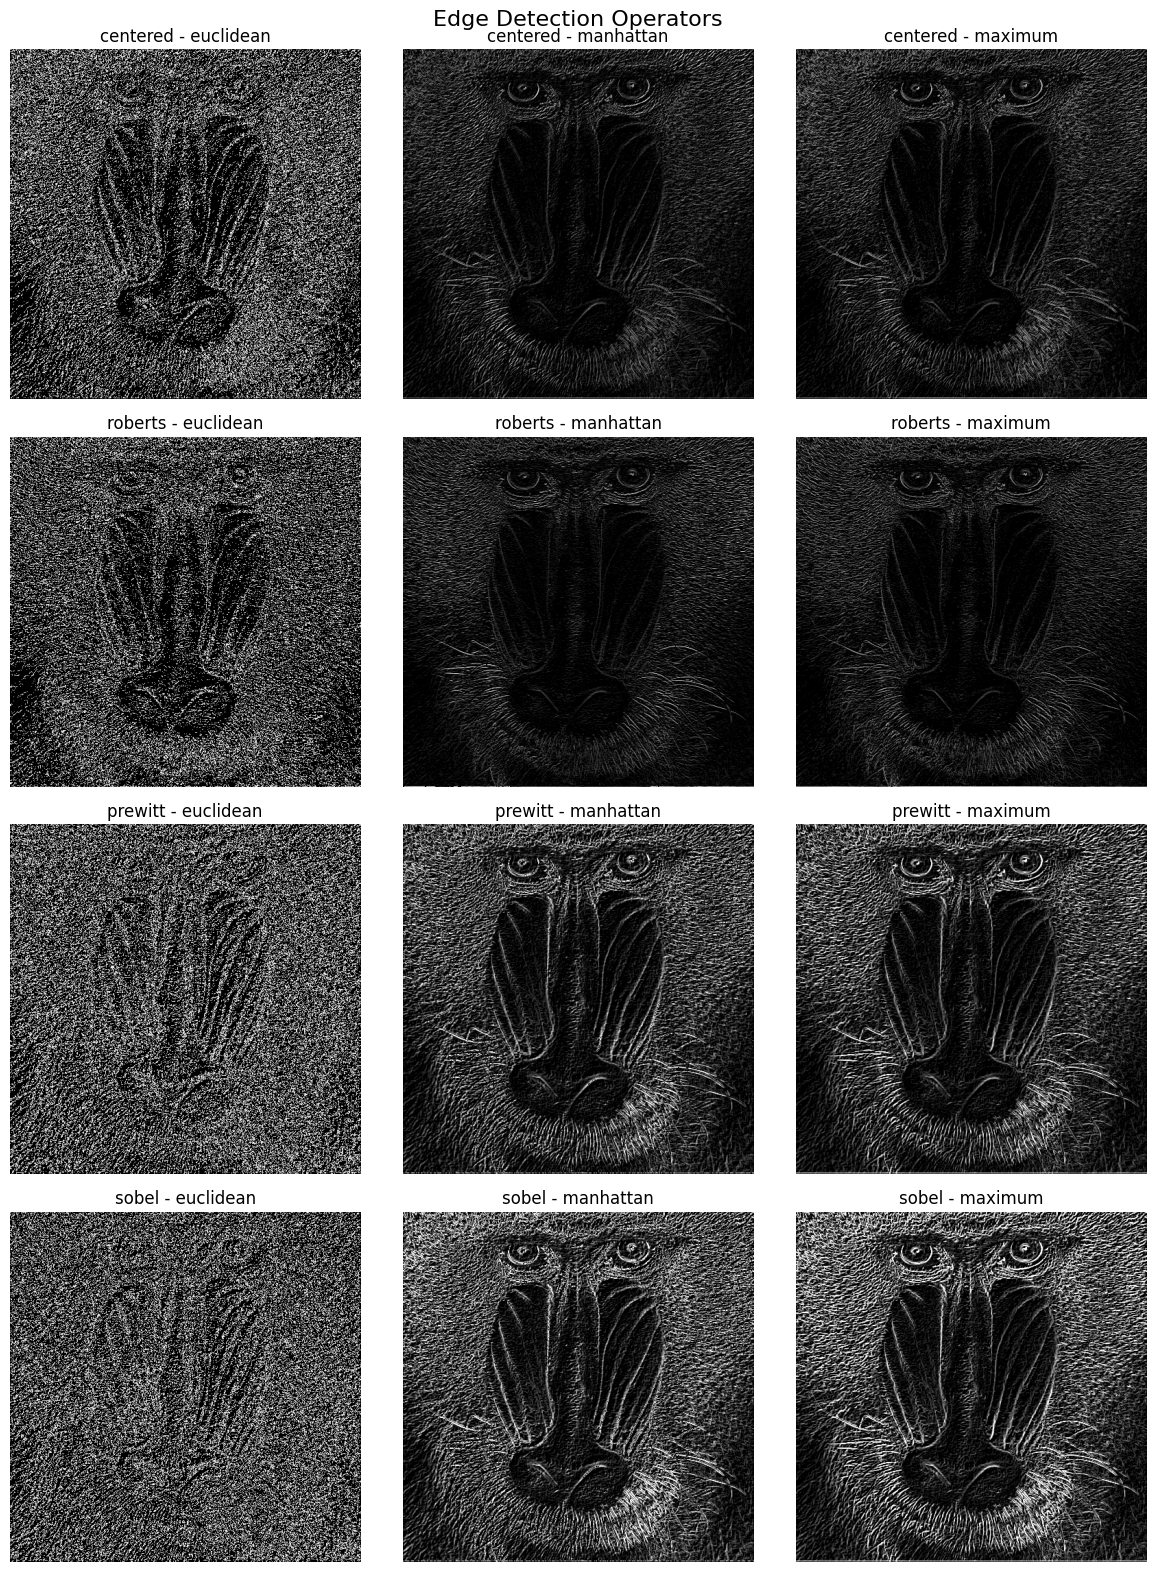

In [18]:
# plot 4x3 subplots, for each gradient operator and each gradient magnitude
gradOp = ['centered', 'roberts', 'prewitt', 'sobel']
gradMag = ['euclidean', 'manhattan', 'maximum']
fig, axs = plt.subplots(4, 3, figsize=(12, 16))
for i in range(4):
    for j in range(3):
        axs[i, j].imshow(getEdgeMap(I, gradient=gradOp[i], magnitude=gradMag[j], threshold=11.0), cmap='gray')
        axs[i, j].set_title(f'{gradOp[i]} - {gradMag[j]}')
        axs[i, j].axis('off')  # Hide axis
# figure title
plt.suptitle('Edge Detection Operators', fontsize=16)
plt.tight_layout()
plt.show()

### 2.2 Laplacian Edge detector

In [19]:
# zero crossing detection
def zeroCrossing(I, threshold=0):
    """
    Perform zero crossing detection on an image.
    
    Parameters:
    I : Input image
    """
    # Create a new image with the same shape as the input image
    J = np.zeros_like(I, dtype=np.float32)
    
    kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    # Apply the zero crossing detection formula
    J = cv2.filter2D(I, -1, kernel)
    # print(np.min(J), np.max(J))

    zc = np.zeros_like(J)
    # Find zero crossings
    for i in range(1, J.shape[0] - 1):
        for j in range(1, J.shape[1] - 1):
            if (J[i, j] > threshold and (J[i-1, j] < threshold or J[i+1, j] < threshold or J[i, j-1] < threshold or J[i, j+1] < threshold)) or \
               (J[i, j] < -threshold and (J[i-1, j] > -threshold or J[i+1, j] > -threshold or J[i, j-1] > -threshold or J[i, j+1] > -threshold)):
                zc[i, j] = 255
            else:
                zc[i, j] = 0

    # Clip the values to be in the range [0, 255]
    zc = np.clip(zc, 0, 255).astype(np.uint8)

    return zc


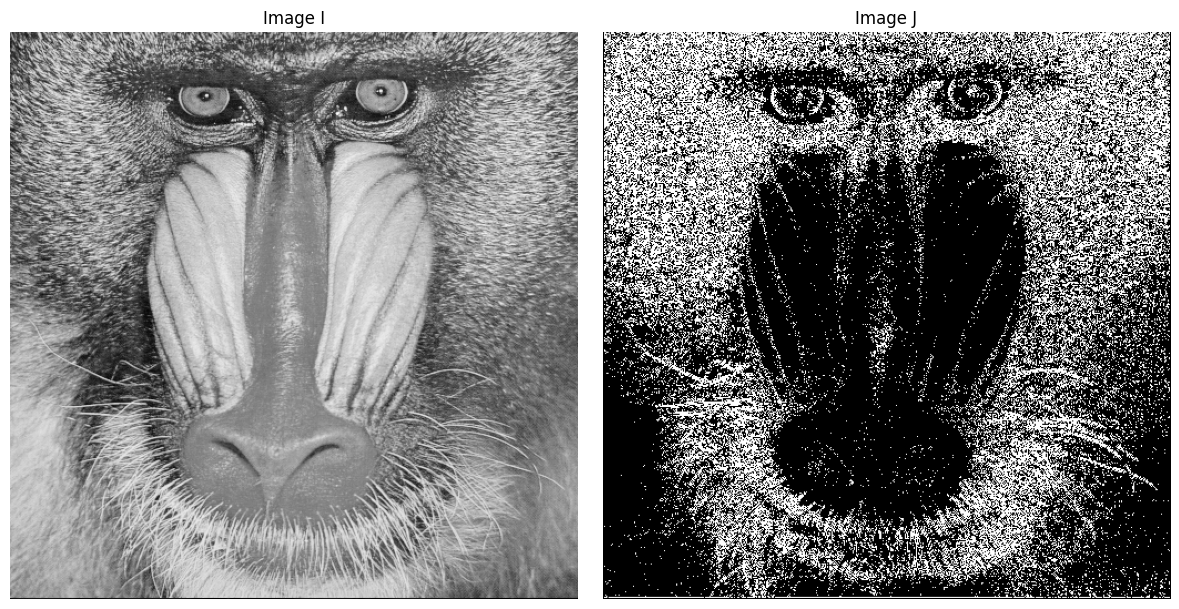

In [20]:
img_path = '4.2.03.tiff'
# Read the image
I = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
I = I.astype(np.float32)

if I is None:
    raise ValueError("Image not found or unable to load.")

J = zeroCrossing(I, threshold=50.0)
plotImage(I, J)
